In [16]:
import pandas as pd
import os

# Folder containing your CSV files
folder_path = r"C:\Users\phamh\Desktop\New folder\result"  # Replace with your folder path

# List of all result.csv files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Load all CSV files into a dictionary of DataFrames using file names as model names
results = {}
for file in csv_files:
    model_name = os.path.splitext(file)[0]  # Remove the '.csv' extension to use as the model name
    file_path = os.path.join(folder_path, file)
    results[model_name] = pd.read_csv(file_path)

# Display the available model names and preview one of the DataFrames
print("Available Models:", list(results.keys()))
print(results[list(results.keys())[0]].head())  # Show data from the first model


Available Models: ['v11medium_final', 'v11n_augment_old', 'v11n_relabel', 'v11s_old', 'v8small_final']
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   42.8352         1.42246         3.38381         1.52739   
1      2   73.3117         1.56023         2.50952         1.63982   
2      3  107.4990         1.73984         2.61845         1.81586   
3      4  139.6690         1.83155         2.58115         1.83783   
4      5  172.0700         1.74872         2.55871         1.79391   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.17266            0.24368           0.12113   
1               0.33163            0.23539           0.07188   
2               0.06874            0.23893           0.10127   
3               0.10373            0.13523           0.04070   
4               0.20571            0.18996           0.13503   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0            

In [17]:
# Define the new order and names
new_order_and_names = {
    "v11s(9)": results['v11s_old'],  # Example renaming
    "v11n(9)": results['v11n_augment_old'],
    "v11n(5)": results['v11n_relabel'],
    "v8s(3)": results['v8small_final'],
    "v11m(3)": results['v11medium_final']
}

# Update the results dictionary
results = new_order_and_names

# Display the new model names and preview one of the DataFrames
print("Reordered and Renamed Models:", list(results.keys()))
print(results["v11m(3)"].head())  # Show data from the renamed and reordered model

Reordered and Renamed Models: ['v11s(9)', 'v11n(9)', 'v11n(5)', 'v8s(3)', 'v11m(3)']
   epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   42.8352         1.42246         3.38381         1.52739   
1      2   73.3117         1.56023         2.50952         1.63982   
2      3  107.4990         1.73984         2.61845         1.81586   
3      4  139.6690         1.83155         2.58115         1.83783   
4      5  172.0700         1.74872         2.55871         1.79391   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.17266            0.24368           0.12113   
1               0.33163            0.23539           0.07188   
2               0.06874            0.23893           0.10127   
3               0.10373            0.13523           0.04070   
4               0.20571            0.18996           0.13503   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.07144       1.

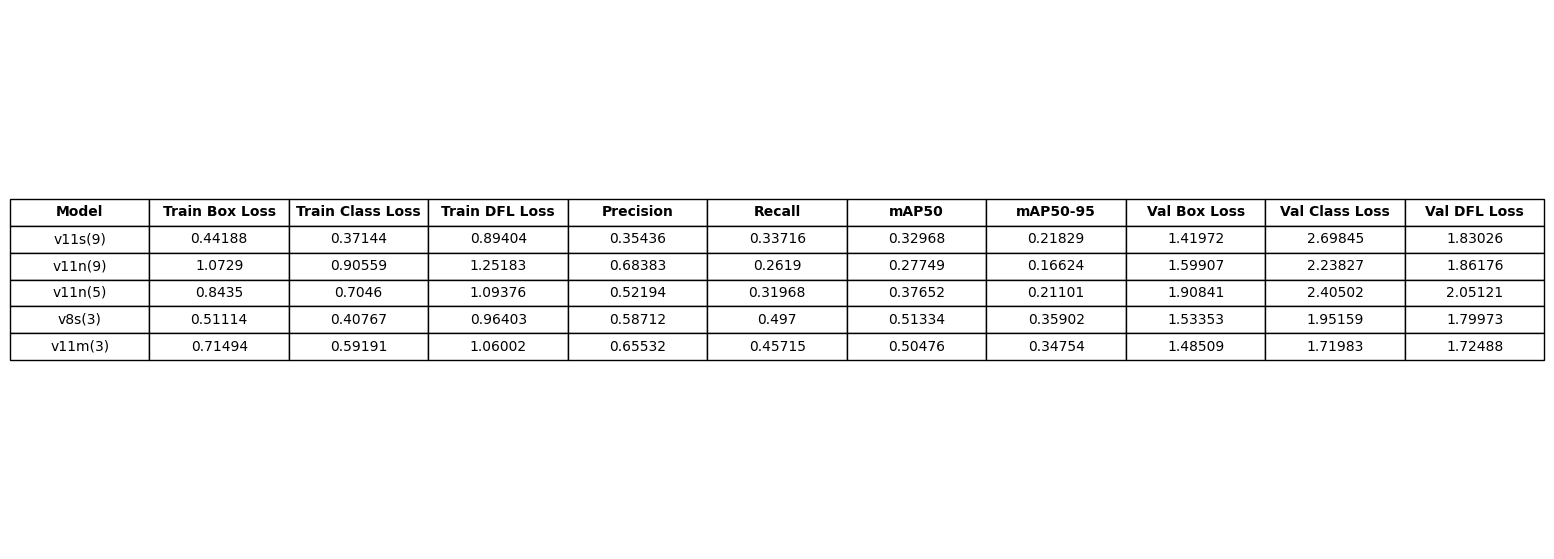

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame to hold the best epoch data
summary_data = []

for model_name, df in results.items():
    # Find the row with the maximum metrics/mAP50(B)
    best_epoch = df.loc[df['metrics/mAP50(B)'].idxmax()]
    # Append data to the summary
    summary_data.append({
        "Model": model_name,
        "Train Box Loss": best_epoch["train/box_loss"],
        "Train Class Loss": best_epoch["train/cls_loss"],
        "Train DFL Loss": best_epoch["train/dfl_loss"],
        "Precision": best_epoch["metrics/precision(B)"],
        "Recall": best_epoch["metrics/recall(B)"],
        "mAP50": best_epoch["metrics/mAP50(B)"],
        "mAP50-95": best_epoch["metrics/mAP50-95(B)"],
        "Val Box Loss": best_epoch["val/box_loss"],
        "Val Class Loss": best_epoch["val/cls_loss"],
        "Val DFL Loss": best_epoch["val/dfl_loss"],
    })

# Convert summary data into a DataFrame
summary_df = pd.DataFrame(summary_data)

# Plot the table
fig, ax = plt.subplots(figsize=(12, len(summary_df) + 2))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=summary_df.values, colLabels=summary_df.columns, loc='center', cellLoc='center')

# Customize font size and spacing
table.auto_set_font_size(False)
table.set_fontsize(10)

# Adjust row heights and make the first row (header) bold
for (row, col), cell in table.get_celld().items():
    cell.set_height(0.05)  # Increase row height
    cell.set_width(0.15)
    if row == 0:  # Header row
        cell.set_text_props(fontweight='bold')  # Make text bold

plt.show()



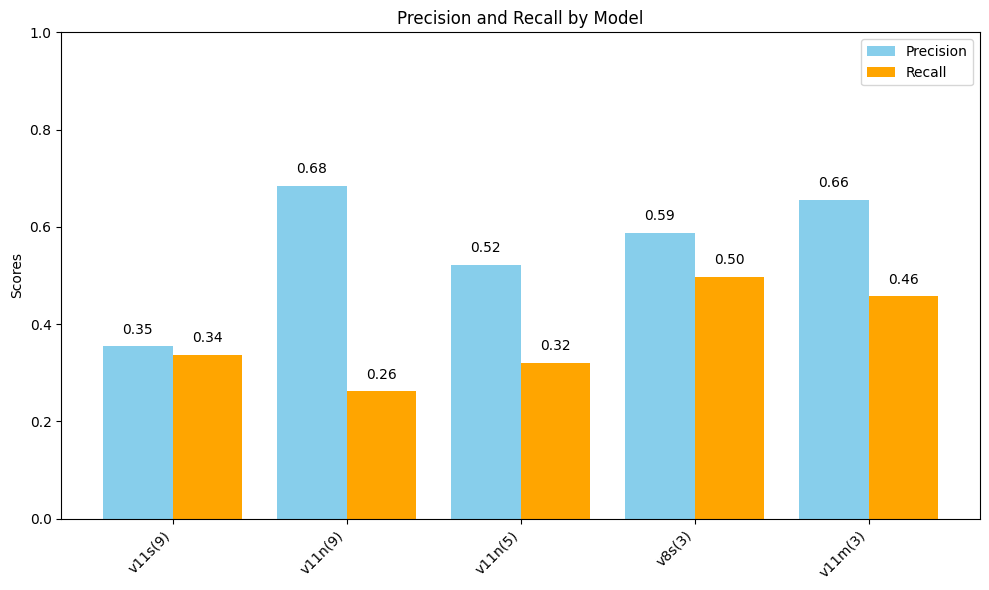

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Extract precision and recall data
models = summary_df['Model']  # Get model names
precision = summary_df['Precision']  # Precision values
recall = summary_df['Recall']  # Recall values

# Set up the bar plot
x = np.arange(len(models))  # Positions for the models
width = 0.4  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for precision and recall
precision_bars = ax.bar(x - width / 2, precision, width, label='Precision', color='skyblue')
recall_bars = ax.bar(x + width / 2, recall, width, label='Recall', color='orange')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate model names for better visibility
ax.set_ylabel('Scores')
ax.set_ylim(0, 1)  # Set y-axis range to 0-1
ax.set_title('Precision and Recall by Model')
ax.legend()

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

add_labels(precision_bars)
add_labels(recall_bars)

plt.tight_layout()
plt.show()


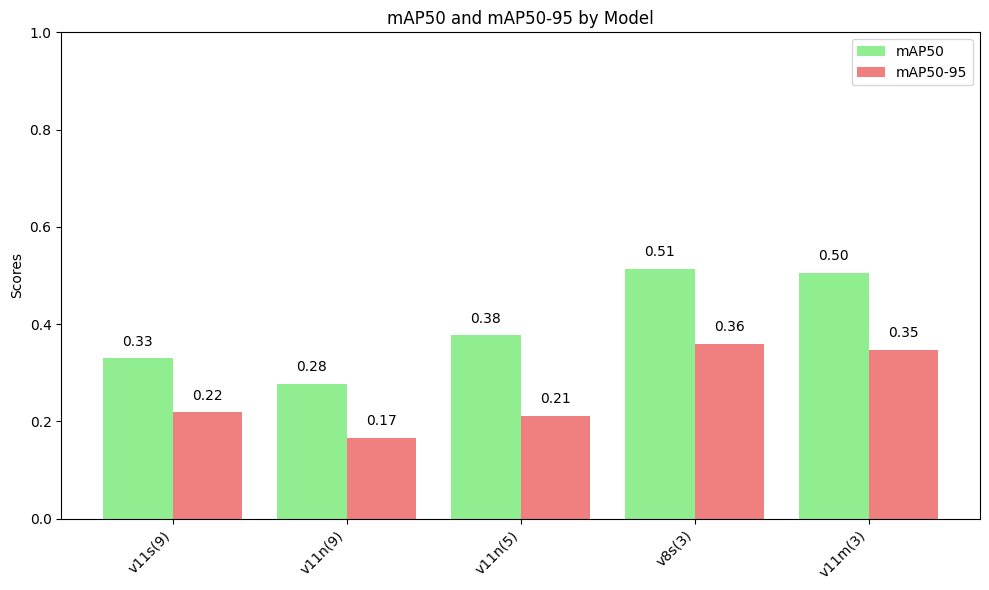

In [31]:
# Extract mAP50 and mAP50-95 data
mAP50 = summary_df['mAP50']  # mAP50 values
mAP50_95 = summary_df['mAP50-95']  # mAP50-95 values

# Set up the bar plot for mAP50 and mAP50-95
x = np.arange(len(models))  # Positions for the models
width = 0.4  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for mAP50 and mAP50-95
mAP50_bars = ax.bar(x - width / 2, mAP50, width, label='mAP50', color='lightgreen')
mAP50_95_bars = ax.bar(x + width / 2, mAP50_95, width, label='mAP50-95', color='lightcoral')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate model names for better visibility
ax.set_ylabel('Scores')
ax.set_ylim(0, 1)  # Set y-axis range to 0-1
ax.set_title('mAP50 and mAP50-95 by Model')
ax.legend()

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

add_labels(mAP50_bars)
add_labels(mAP50_95_bars)

plt.tight_layout()
plt.show()


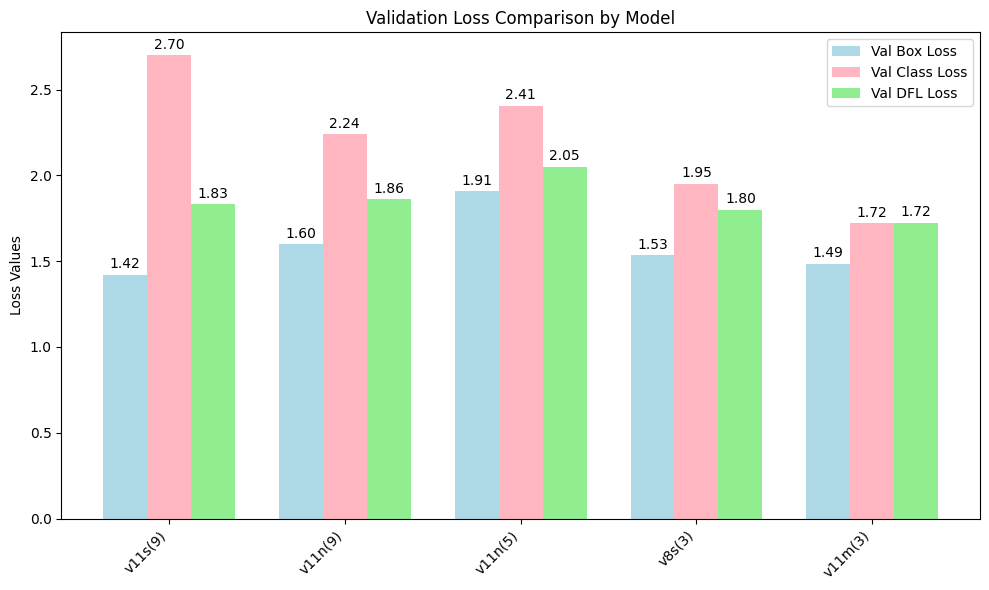

In [32]:
# Extract validation loss data
val_box_loss = summary_df['Val Box Loss']  # Validation box loss values
val_cls_loss = summary_df['Val Class Loss']  # Validation class loss values
val_dfl_loss = summary_df['Val DFL Loss']  # Validation DFL loss values

# Set up the bar plot for validation losses
x = np.arange(len(models))  # Positions for the models
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for Validation Box Loss, Class Loss, and DFL Loss
val_box_loss_bars = ax.bar(x - width, val_box_loss, width, label='Val Box Loss', color='lightblue')
val_cls_loss_bars = ax.bar(x, val_cls_loss, width, label='Val Class Loss', color='lightpink')
val_dfl_loss_bars = ax.bar(x + width, val_dfl_loss, width, label='Val DFL Loss', color='lightgreen')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate model names for better visibility
ax.set_ylabel('Loss Values')
ax.set_title('Validation Loss Comparison by Model')
ax.legend()

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

add_labels(val_box_loss_bars)
add_labels(val_cls_loss_bars)
add_labels(val_dfl_loss_bars)

plt.tight_layout()
plt.show()


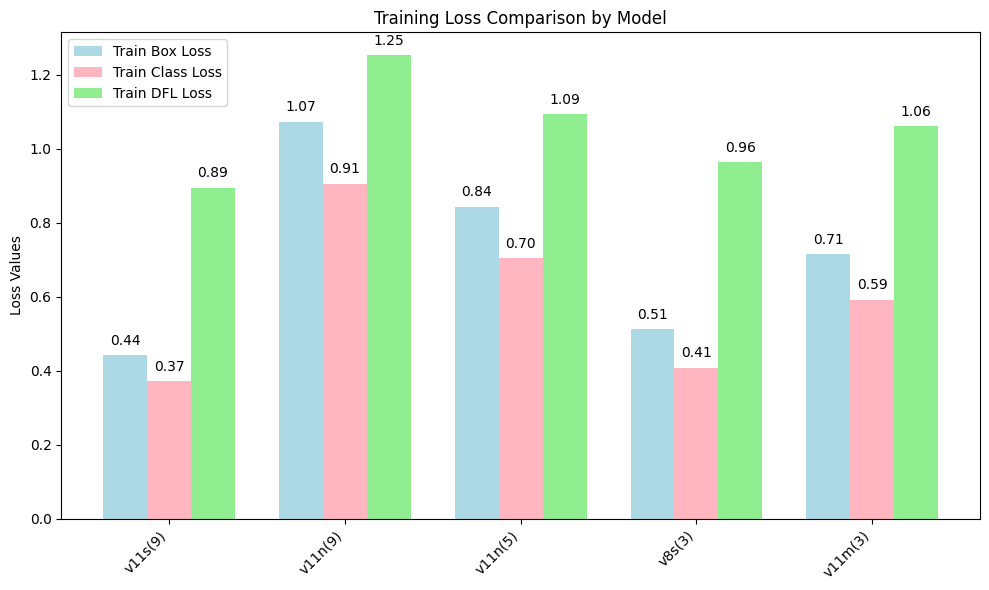

In [34]:
# Extract training loss data
train_box_loss = summary_df['Train Box Loss']  # Training box loss values
train_cls_loss = summary_df['Train Class Loss']  # Training class loss values
train_dfl_loss = summary_df['Train DFL Loss']  # Training DFL loss values

# Set up the bar plot for training losses
x = np.arange(len(models))  # Positions for the models
width = 0.25  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for Training Box Loss, Class Loss, and DFL Loss
train_box_loss_bars = ax.bar(x - width, train_box_loss, width, label='Train Box Loss', color='lightblue')
train_cls_loss_bars = ax.bar(x, train_cls_loss, width, label='Train Class Loss', color='lightpink')
train_dfl_loss_bars = ax.bar(x + width, train_dfl_loss, width, label='Train DFL Loss', color='lightgreen')

# Customize the plot
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate model names for better visibility
ax.set_ylabel('Loss Values')
ax.set_title('Training Loss Comparison by Model')
ax.legend()

# Add value labels on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f'{height:.2f}', ha='center', va='bottom', fontsize=10)

add_labels(train_box_loss_bars)
add_labels(train_cls_loss_bars)
add_labels(train_dfl_loss_bars)

plt.tight_layout()
plt.show()


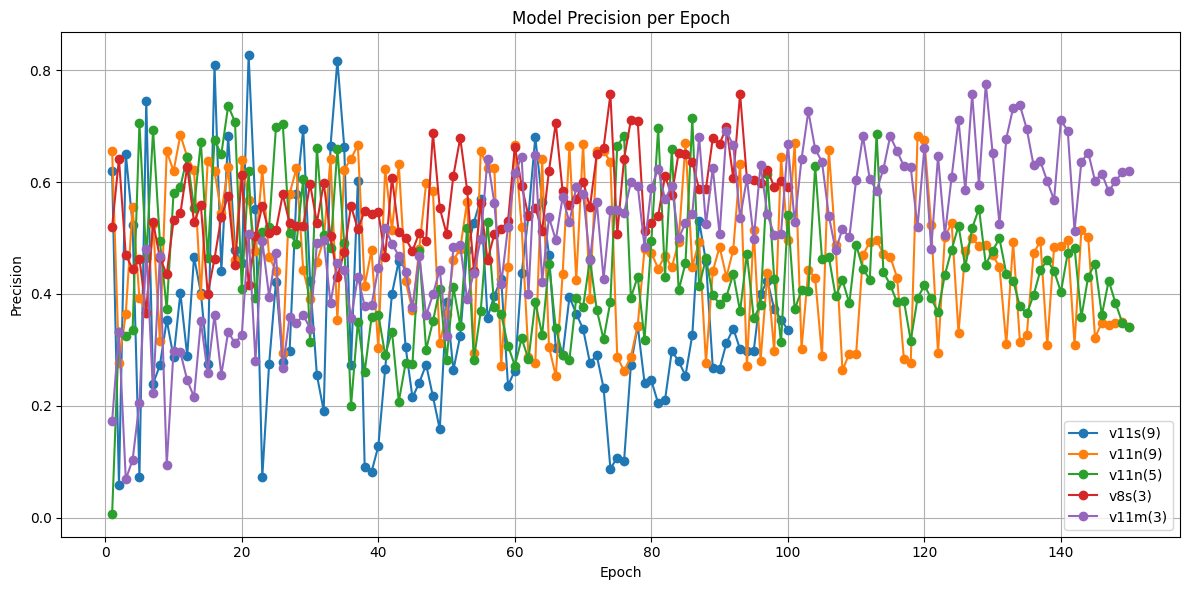

In [38]:
# Extract precision data for each model
precision_data = {}

# Collect precision values for each model, using the epoch from the result DataFrame
for model_name in models:
    model_df = results[model_name]
    precision_data[model_name] = model_df['metrics/precision(B)']
    epochs = model_df['epoch']  # Extract epoch values from the model DataFrame

# Set up the line plot
plt.figure(figsize=(12, 6))

# Plot precision for each model
for model_name, precision in precision_data.items():
    model_df = results[model_name]
    epochs = model_df['epoch']
    plt.plot(epochs, precision, label=model_name, marker='o')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Model Precision per Epoch')
plt.legend()  # Show legend to distinguish the models

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


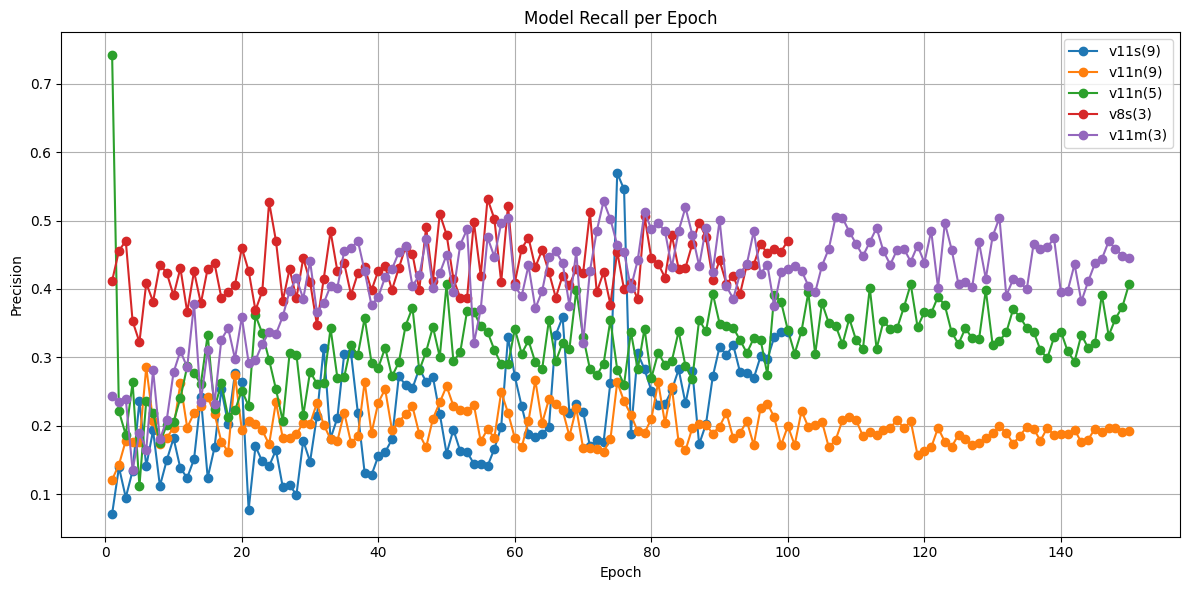

In [42]:
# Extract precision data for each model
precision_data = {}

# Collect precision values for each model, using the epoch from the result DataFrame
for model_name in models:
    model_df = results[model_name]
    precision_data[model_name] = model_df['metrics/recall(B)']
    epochs = model_df['epoch']  # Extract epoch values from the model DataFrame

# Set up the line plot
plt.figure(figsize=(12, 6))

# Plot precision for each model
for model_name, precision in precision_data.items():
    model_df = results[model_name]
    epochs = model_df['epoch']
    plt.plot(epochs, precision, label=model_name, marker='o')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Model Recall per Epoch')
plt.legend()  # Show legend to distinguish the models

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


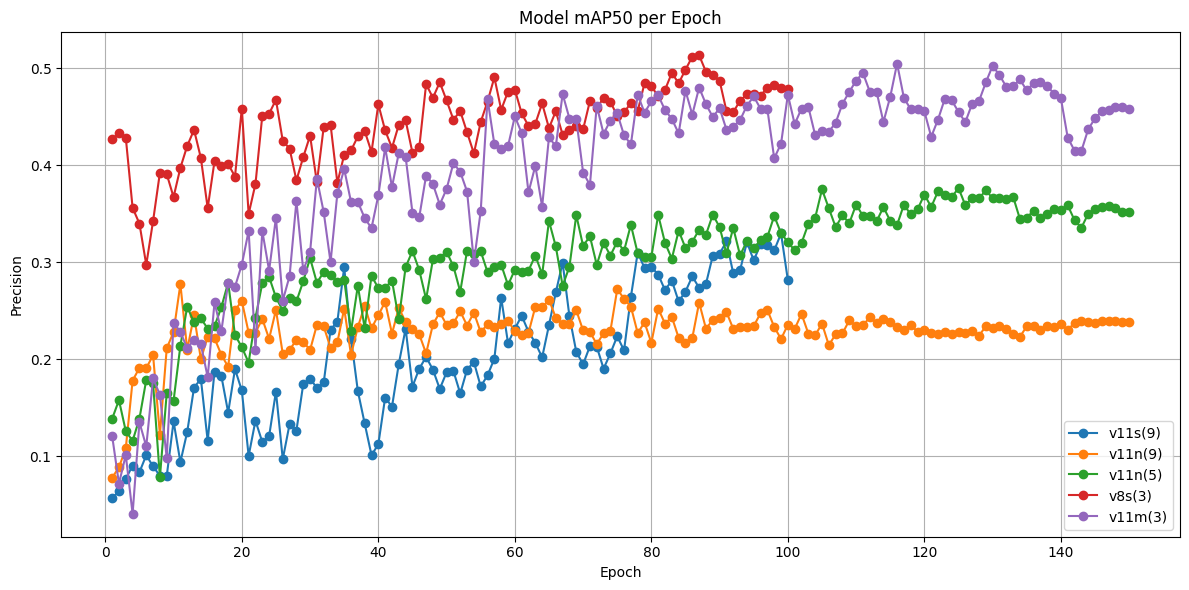

In [43]:
# Extract precision data for each model
precision_data = {}

# Collect precision values for each model, using the epoch from the result DataFrame
for model_name in models:
    model_df = results[model_name]
    precision_data[model_name] = model_df['metrics/mAP50(B)']
    epochs = model_df['epoch']  # Extract epoch values from the model DataFrame

# Set up the line plot
plt.figure(figsize=(12, 6))

# Plot precision for each model
for model_name, precision in precision_data.items():
    model_df = results[model_name]
    epochs = model_df['epoch']
    plt.plot(epochs, precision, label=model_name, marker='o')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Model mAP50 per Epoch')
plt.legend()  # Show legend to distinguish the models

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


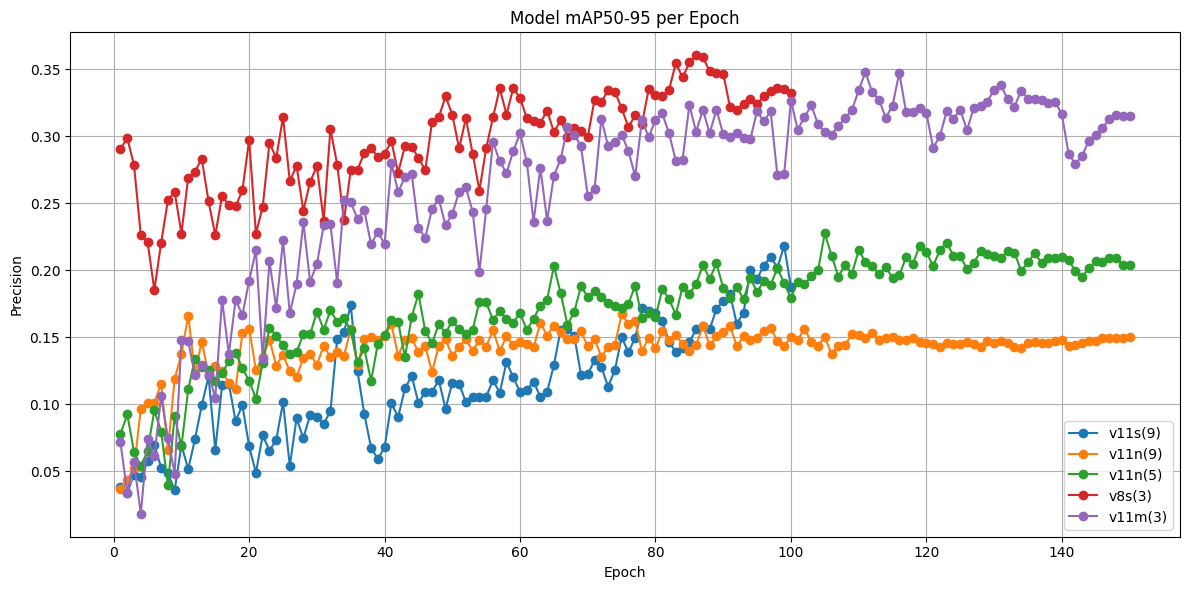

In [44]:
# Extract precision data for each model
precision_data = {}

# Collect precision values for each model, using the epoch from the result DataFrame
for model_name in models:
    model_df = results[model_name]
    precision_data[model_name] = model_df['metrics/mAP50-95(B)']
    epochs = model_df['epoch']  # Extract epoch values from the model DataFrame

# Set up the line plot
plt.figure(figsize=(12, 6))

# Plot precision for each model
for model_name, precision in precision_data.items():
    model_df = results[model_name]
    epochs = model_df['epoch']
    plt.plot(epochs, precision, label=model_name, marker='o')

# Customize the plot
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Model mAP50-95 per Epoch')
plt.legend()  # Show legend to distinguish the models

# Show grid for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()
